### Домашняя работа №6

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, f1_score, roc_auc_score, confusion_matrix, RocCurveDisplay,  ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.ensemble import AdaBoostClassifier, HistGradientBoostingClassifier, RandomForestClassifier, StackingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.inspection import permutation_importance
import json
import joblib

In [24]:

df = pd.read_csv("../seminars/S06-hw-dataset-02.csv")

In [25]:
df.head(20)

,id,f01,f02,f03,f04,f05,f06,f07,f08,f09,...,f29,f30,f31,f32,f33,f34,f35,x_int_1,x_int_2,target
0,1,-0.149235,-2.826966,-0.522901,-4.198449,1.364943,0.815043,-1.195518,-1.932232,2.396353,...,-0.159323,0.448015,0.572745,0.149916,0.878392,-0.679733,1.412751,0.421883,9.217167,1
1,2,-1.966180,-4.877542,0.268367,-9.607791,0.097149,1.347185,-3.872575,-0.395117,1.710068,...,-0.389212,1.383794,0.169876,0.043969,-0.963545,1.006643,-2.488690,9.590124,24.772826,0
2,3,-0.555964,-0.999920,0.209673,-14.119498,-1.808950,-0.006222,-4.651108,0.911944,-0.289037,...,-1.383970,3.044321,-0.182864,1.425649,-8.418598,-4.629754,-0.439798,0.555919,41.800517,0
3,4,-2.049199,-5.600713,-1.664677,-6.263893,-5.224455,0.848351,1.407210,-0.542080,0.119102,...,-2.713080,2.762637,-0.520796,-0.142455,1.668338,2.292810,-10.744916,11.476977,65.315860,0
4,5,-0.220556,4.889479,-2.235840,6.450046,0.774389,-2.382625,2.584816,4.211856,-0.317889,...,-1.302872,2.478862,1.528610,1.098131,3.547087,2.517757,-9.364106,-1.078404,93.017870,0
5,6,2.977878,3.088654,-0.197899,2.108979,0.039480,0.798094,-1.119793,2.408403,-0.555855,...,-0.157844,0.503093,0.220765,1.489865,4.116737,-0.815933,-5.120649,9.197635,0.880213,1
6,7,2.473418,8.520288,1.307130,4.086821,2.795773,-1.760687,-2.670722,3.629828,-1.817547,...,-0.125201,-1.085034,-1.229092,-0.301936,-3.410467,-0.014363,1.161173,21.074235,21.831822,0
7,8,-1.571984,-0.573208,0.308809,-1.100997,-2.161888,1.224171,0.517167,-4.743501,1.997271,...,0.682501,-3.216268,-2.007971,-0.681398,-5.161191,1.250632,5.016772,0.901073,0.374336,0
8,9,-2.595672,1.650248,0.017120,-4.217647,-0.280851,0.644834,-0.944358,-0.124713,3.571426,...,3.541427,-1.353347,1.776881,0.428259,-6.197406,0.071479,3.546397,-4.283503,0.304540,1
9,10,0.025874,-2.873845,0.438832,-5.353178,1.517070,-0.555454,-1.160253,-1.635842,-0.239880,...,-0.392255,1.057885,0.424084,1.335843,-3.849633,-3.615579,6.410028,-0.074358,12.575392,0


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18000 entries, 0 to 17999
Data columns (total 39 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       18000 non-null  int64  
 1   f01      18000 non-null  float64
 2   f02      18000 non-null  float64
 3   f03      18000 non-null  float64
 4   f04      18000 non-null  float64
 5   f05      18000 non-null  float64
 6   f06      18000 non-null  float64
 7   f07      18000 non-null  float64
 8   f08      18000 non-null  float64
 9   f09      18000 non-null  float64
 10  f10      18000 non-null  float64
 11  f11      18000 non-null  float64
 12  f12      18000 non-null  float64
 13  f13      18000 non-null  float64
 14  f14      18000 non-null  float64
 15  f15      18000 non-null  float64
 16  f16      18000 non-null  float64
 17  f17      18000 non-null  float64
 18  f18      18000 non-null  float64
 19  f19      18000 non-null  float64
 20  f20      18000 non-null  float64
 21  f21      180

In [27]:
df.describe()

,id,f01,f02,f03,f04,f05,f06,f07,f08,f09,...,f29,f30,f31,f32,f33,f34,f35,x_int_1,x_int_2,target
count,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,...,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,1.800000e+04,18000.000000
mean,9000.500000,-0.418555,0.614251,0.004559,0.059000,0.405086,0.012123,-0.283473,-0.266880,0.255107,...,-0.139825,0.108568,0.007238,0.000904,-0.716862,-0.274520,0.344991,1.517339,2.576221e+01,0.262611
std,5196.296758,2.178005,3.926778,1.000134,5.713672,2.497581,0.987226,2.193891,2.081431,2.225776,...,2.148834,2.234315,0.997861,1.002115,3.913704,2.482890,4.927315,10.630850,5.423748e+01,0.440065
min,1.000000,-10.014698,-15.510323,-4.031762,-23.663256,-12.289308,-3.741536,-9.591425,-8.293319,-13.655742,...,-8.171469,-9.214171,-3.937091,-3.963063,-19.389908,-10.031559,-20.768452,-107.788145,1.895059e-07,0.000000
25%,4500.750000,-1.866134,-2.048192,-0.673127,-3.544964,-1.153000,-0.653090,-1.743214,-1.688121,-1.177480,...,-1.589638,-1.369266,-0.663023,-0.684164,-3.286842,-1.897893,-2.752685,-2.018750,1.226029e+00,0.000000
50%,9000.500000,-0.465100,0.600291,0.003581,0.072826,0.485625,0.018765,-0.251263,-0.302463,0.350739,...,-0.204785,0.158715,0.001912,-0.003157,-0.618472,-0.339901,0.573153,0.318011,6.581865e+00,0.000000
75%,13500.250000,0.966393,3.229850,0.671390,3.689490,2.075739,0.689304,1.195481,1.109589,1.764113,...,1.254595,1.600671,0.677296,0.676558,1.948803,1.314163,3.649794,4.212111,2.576847e+01,1.000000
max,18000.000000,9.589975,15.417329,3.817025,26.815691,10.665184,3.528280,7.794627,8.892834,8.699629,...,9.290667,8.794320,4.341030,3.781380,14.065595,10.639974,20.226291,94.891804,1.103449e+03,1.000000


In [28]:
df.shape

(18000, 39)

In [29]:
df["target"].value_counts(normalize = True)

target
0    0.737389
1    0.262611
Name: proportion, dtype: float64

In [30]:
missing = df.isnull()
missing.sum().sum()   # пропусков в столбцах нет

0

In [31]:
X = df.drop(columns=["id", "target"])
y = df["target"]

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

Одинаковый seed нужен, чтобы одинакого сравнивать модели, ведь без указания random_state результаты каждый раз будут отличаться, а из-за этого будут отличаться и метрики, так что честного сравнения не получится. Также это нужно, чтобы результаты были воспроизводимы в последующем.

Стратификация нужна, чтобы какого-то одного признака не преобладало в обучающем датасете, в плохом случае может получится, что какой-то признак вообще не попадет в обучающую выборку, что сильно понизит точность.

In [33]:
def metriki(y, y_pred):
    print(f"Accuracy: {accuracy_score(y, y_pred)}")
    print(f"Precision: {precision_score(y, y_pred)}")
    print(f"F1-score: {f1_score(y, y_pred)}")
    print(f"ROC-AUC: {roc_auc_score(y, y_pred)}")
    print(f"""Confusion matrix: 
{confusion_matrix(y, y_pred)}""")

In [34]:
def roc_auc_curve(name, y_test, y_proba):
    RocCurveDisplay.from_predictions(
        y_test, 
        y_proba
    )
    plt.title(f"ROC curve - {name}")
    plt.grid(True)
    plt.savefig(f"figures/ROC_plot_{name}.png")

    if name =="HistGradientBoost":
        plt.savefig(f"artifacts/figures/ROC_plot_{name}.png")

    plt.show()
    return 0


In [35]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

Accuracy: 0.6153333333333333
Precision: 0.26717557251908397
F1-score: 0.2668360864040661
ROC-AUC: 0.5030498159554254
Confusion matrix: 
[[2454  864]
 [ 867  315]]


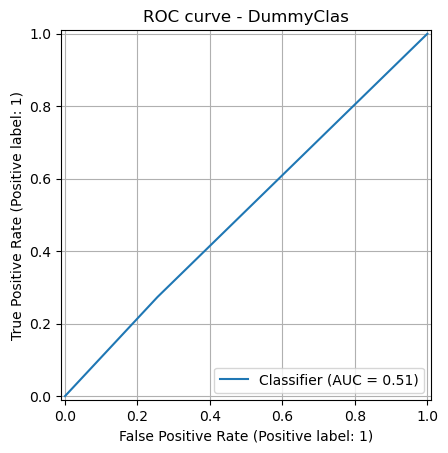

0

In [36]:
base_dummy = DummyClassifier(strategy = "stratified")

base_dummy.fit(X_train, y_train)
dummy_pred = base_dummy.predict(X_test)
dummy_pred_proba = base_dummy.predict_proba(X_test)[:, 1]

metriki(y_test, dummy_pred)
roc_auc_curve("DummyClas" ,y_test, dummy_pred_proba)

Accuracy: 0.8162222222222222
Precision: 0.7369826435246996
F1-score: 0.5717244950802693
ROC-AUC: 0.7038159799034952
Confusion matrix: 
[[3121  197]
 [ 630  552]]


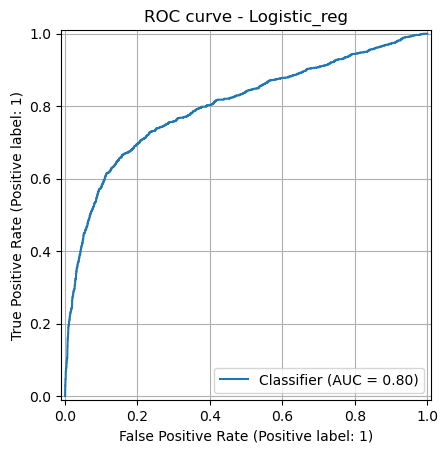

0

In [37]:
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ("log_reg", LogisticRegression())])

pipe.fit(X_train, y_train)
log_reg_pred = pipe.predict(X_test)
log_reg_proba = pipe.predict_proba(X_test)[:, 1]

metriki(y_test, log_reg_pred)
roc_auc_curve("Logistic_reg", y_test, log_reg_proba)

DummyClassifer справляется неплохо, но только потому что 73% всех данных относится к 0 признаку. ROC-AUC критерий четко показал, что выбор на самом деле делается рандомно, но в сторону значения, которое встречается чаще.

Логарифмическая регрессия справилась немного лучше, метрике ROC-AUC результат стал выше на 20%, что уже хорошо, значит модель имеет некоторые критерии по выбору класса. Но мы все ещё имеем высокую точность потому, что классы дисбалансируют, и модель верно предсказывает класс 1 меньше чем в 50% случаях.

Accuracy: 0.8311111111111111
Precision: 0.7604938271604939
F1-score: 0.6184738955823293
ROC-AUC: 0.7313408175067239
Confusion matrix: 
[[3124  194]
 [ 566  616]]


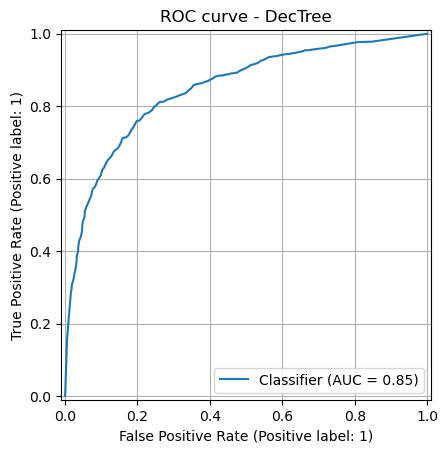

0

In [38]:
dec_tree = DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, random_state=42)

dec_tree.fit(X_train, y_train)
dec_tree_pred = dec_tree.predict(X_test)
dec_tree_proba = dec_tree.predict_proba(X_test)[:, 1]

metriki(y_test, dec_tree_pred)
roc_auc_curve("DecTree", y_test, dec_tree_proba)

In [39]:
param_grid = {
    'max_depth': [ 5, 7, 10],
    "min_samples_leaf": [50, 100, 150]
}

dt_grid_search= GridSearchCV(dec_tree, param_grid, cv=cv, scoring="roc_auc")

dt_grid_search.fit(X_train, y_train)
params_dt = dt_grid_search.best_params_
cv_score_dt = dt_grid_search.best_score_

params_dt


{'max_depth': 10, 'min_samples_leaf': 50}

Accuracy: 0.8337777777777777
Precision: 0.648224043715847
F1-score: 0.7173091458805745
ROC-AUC: 0.8238312481067733
Confusion matrix: 
[[2803  515]
 [ 233  949]]


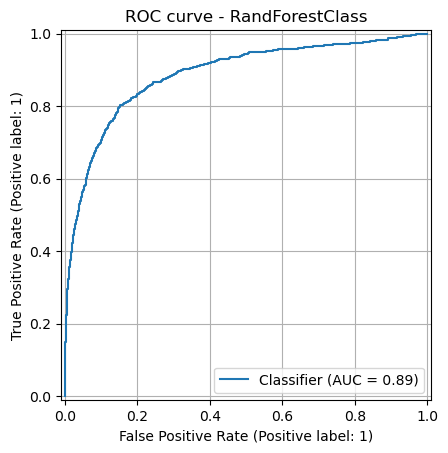

0

In [40]:
rd_tree = RandomForestClassifier(
    n_estimators=100,
    max_features = "sqrt",
    max_depth=7,
    min_samples_leaf = 40,
    class_weight='balanced')

rd_tree.fit(X_train, y_train)
rd_tree_pred = rd_tree.predict(X_test)
rd_tree_proba = rd_tree.predict_proba(X_test)[:, 1]

metriki(y_test, rd_tree_pred)
roc_auc_curve("RandForestClass", y_test, rd_tree_proba)

In [41]:
rd_param_grid = {
    "n_estimators": [50, 100],
    "max_depth": [5, 7],
    "min_samples_leaf": [40, 70]
}

rd_grid_search = GridSearchCV(rd_tree, rd_param_grid, cv = cv, scoring="roc_auc")

rd_grid_search.fit(X_train, y_train)
rd_params = rd_grid_search.best_params_
cv_score_rd = rd_grid_search.best_score_

rd_params

{'max_depth': 7, 'min_samples_leaf': 40, 'n_estimators': 50}

Без параметра class_weight='balanced' я смогла добиться лишь ROC-AUC=68%, что довольно мало. Но после добавления этого параметра метрика взлетела аж до 81%, а все потому, что за неправильный ответ редкого класса модель получает сильный штраф из-за чего становится избирательнее к этому таргету.

Accuracy: 0.8993333333333333
Precision: 0.881675392670157
F1-score: 0.788020589611605
ROC-AUC: 0.8391476426077725
Confusion matrix: 
[[3205  113]
 [ 340  842]]


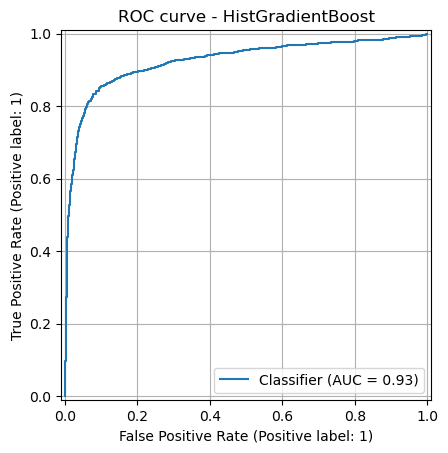

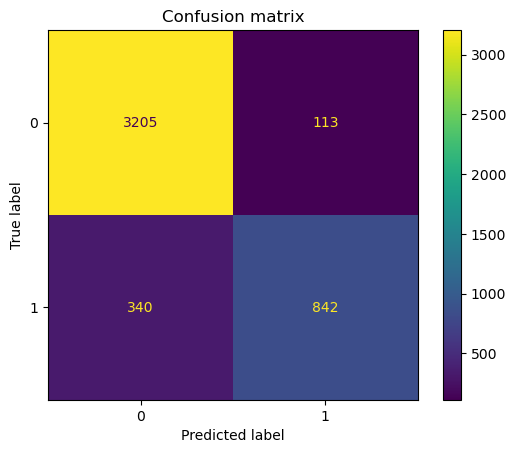

In [42]:
hist_boost = HistGradientBoostingClassifier(
    max_depth=7,
    min_samples_leaf=150,
    learning_rate=0.1
)

hist_boost.fit(X_train, y_train)
hist_boost_pred = hist_boost.predict(X_test)
hist_boost_proba = hist_boost.predict_proba(X_test)[:, 1]

metriki(y_test, hist_boost_pred)
roc_auc_curve("HistGradientBoost", y_test, hist_boost_proba)

ConfusionMatrixDisplay.from_predictions(
    y_test, 
    hist_boost_pred
)

plt.title("Confusion matrix")
plt.savefig("artifacts/figures/ConfusionMatrix.png")


In [43]:
hist_params = {
    "max_depth": [ 7, 9],
    "min_samples_leaf": [100, 150],
     "learning_rate": [0.01, 0.1]
}

hist_grid = GridSearchCV(hist_boost, hist_params, cv = cv, scoring="roc_auc")

hist_grid.fit(X_train, y_train)
hist_params = hist_grid.best_params_
cv_score_hist = hist_grid.best_score_

hist_params

{'learning_rate': 0.1, 'max_depth': 9, 'min_samples_leaf': 150}

В HistGradientBoostingClassifier я добавила минимум параметров и эта модель добилась результатов гораздо лучше, чем RandomForestClassifier с множеством параметров.

Accuracy: 0.8477777777777777
Precision: 0.7613038906414301
F1-score: 0.6788560712611346
ROC-AUC: 0.7720532214685013
Confusion matrix: 
[[3091  227]
 [ 458  724]]


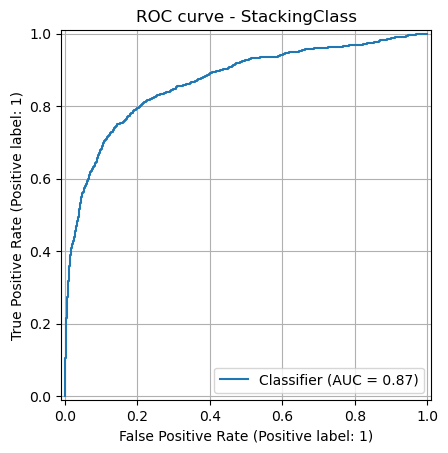

0

In [44]:
estimators = [
    ("lr", Pipeline([("scaler", StandardScaler()), ("log_reg", LogisticRegression(max_iter=50, class_weight='balanced'))])),
    ("rd_f", RandomForestClassifier(n_estimators=50, random_state=42,max_depth=5 , class_weight="balanced")),
    ("ada_boost", AdaBoostClassifier(n_estimators=50, random_state=42, algorithm='SAMME'))
]


final_est = LogisticRegression(max_iter=50, random_state=42)

stack = StackingClassifier(
    estimators=estimators,
    final_estimator=final_est,
    passthrough=False,
    cv = cv,

)

stack.fit(X_train, y_train)
stack_pred = stack.predict(X_test)
stack_proba = stack.predict_proba(X_test)[:, 1]

metriki(y_test, stack_pred)
roc_auc_curve("StackingClass", y_test, stack_proba)

Будем выбирать лучшую модель на основе метрики ROC-AUC.

Из всех обученных моделей самой эффективной оказалась  HistGradientBoostingClassifier с показателеь ROC_AUC около 85%. 

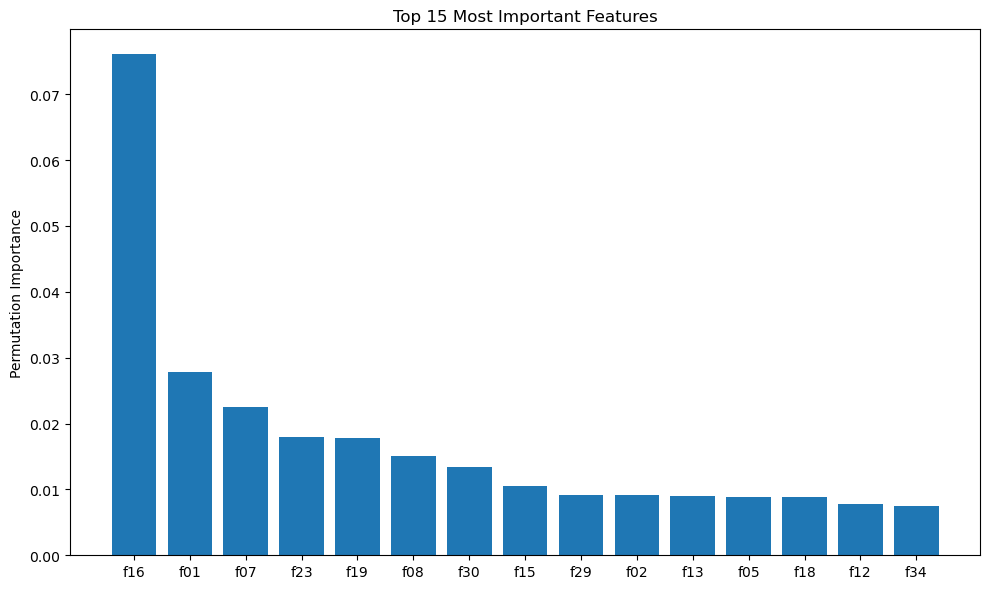

In [45]:
scoring = "roc_auc" if hasattr(hist_boost, "predict_proba") else "accuracy"


perm = permutation_importance(
    hist_boost,
    X_test,
    y_test,
    n_repeats=8,
    random_state=42,
    scoring=scoring
)

imp = perm.importances_mean
idx = np.argsort(imp)[::-1][:15]

plt.figure(figsize=(10, 6))
plt.bar(range(len(idx)), imp[idx])
plt.xticks(range(len(idx)), X_train.columns[idx])
plt.ylabel('Permutation Importance')
plt.title('Top 15 Most Important Features')
plt.tight_layout()
plt.show()


Сильнее всего на модель влияют признаки f16, f01, f07, f19, f23. Так как мы не знаем что скрывается за этими параметрами, то сложно сделать вывод о совпадении ожиданиям данных.

#### Артефакты

In [46]:
def add_metrics_to_json(model_dict, name_model, y_true, y_pred, y_proba):
    metrics = {
        'accuracy': accuracy_score(y_true, y_pred),
        'f1': f1_score(y_true, y_pred),
        'precision': precision_score(y_true, y_pred),
        'roc_auc': roc_auc_score(y_true, y_proba)
    }

    model_dict[name_model] = metrics

    return model_dict

In [47]:
def save_metrics_to_json(model_list):
    all_metrics = {
        }

    for i in range(len(model_list)):
        all_metrics = add_metrics_to_json(all_metrics, model_list[i][0], model_list[i][1], model_list[i][2],model_list[i][3])

    with open("artifacts/metrics_test.json", 'w', encoding='utf-8') as f:
        json.dump(all_metrics, f, indent=2, ensure_ascii=False)

    return all_metrics

In [48]:
models_list = [
    ('DummyClassifer', y_test, dummy_pred, dummy_pred_proba),
    ('LogisticRegress', y_test, log_reg_pred, log_reg_proba),
    ('DecisionTree', y_test, dec_tree_pred, dec_tree_proba), 
    ('RandomForest',  y_test, rd_tree_pred, rd_tree_proba),
    ('HistBoost',  y_test, hist_boost_pred, hist_boost_proba),
    ('Stacking',  y_test, stack_pred, stack_proba)  
]

save_metrics_to_json(models_list)

{'DummyClassifer': {'accuracy': 0.6153333333333333,
  'f1': 0.2668360864040661,
  'precision': 0.26717557251908397,
  'roc_auc': 0.5091463881061002},
 'LogisticRegress': {'accuracy': 0.8162222222222222,
  'f1': 0.5717244950802693,
  'precision': 0.7369826435246996,
  'roc_auc': 0.8008904412072182},
 'DecisionTree': {'accuracy': 0.8311111111111111,
  'f1': 0.6184738955823293,
  'precision': 0.7604938271604939,
  'roc_auc': 0.8480817598516628},
 'RandomForest': {'accuracy': 0.8337777777777777,
  'f1': 0.7173091458805745,
  'precision': 0.648224043715847,
  'roc_auc': 0.8877022119006313},
 'HistBoost': {'accuracy': 0.8993333333333333,
  'f1': 0.788020589611605,
  'precision': 0.881675392670157,
  'roc_auc': 0.9257454850688803},
 'Stacking': {'accuracy': 0.8477777777777777,
  'f1': 0.6788560712611346,
  'precision': 0.7613038906414301,
  'roc_auc': 0.86875260717065}}

In [49]:
best_params_and_sv = {"search_summaries": {
    'DecisionTree': {"best parameters": params_dt, "sc_score":cv_score_dt}, 
    'RandomForest': {"best parameters":rd_params, "sc_score": cv_score_rd},
    'HistBoost':{"best parameters": hist_params,"sc_score":  cv_score_hist},
    }
}

with open("artifacts/search_summaries.json", "w", encoding="utf-8") as f:
    json.dump(best_params_and_sv, f, indent=2, ensure_ascii=False)

In [50]:
best_model = hist_grid.best_estimator_  

joblib.dump(best_model, 'artifacts/best_model.joblib')

['artifacts/best_model.joblib']

In [51]:
best_meta_model = {
    "best model": "HistGradientBoostingClassifier",
    "parameters": hist_params,
    "metrics":  {'accuracy': accuracy_score(y_test, hist_boost_pred),
        'f1': f1_score(y_test, hist_boost_pred),
        'precision': precision_score(y_test, hist_boost_pred),
        'roc_auc': roc_auc_score(y_test, hist_boost_proba)
    }
}

with open("artifacts/best_model_meta.json", "w", encoding="utf-8") as f:
    json.dump(best_meta_model, f, indent=2, ensure_ascii=False)